# LAB 5

## Task 1：Inspection DATA

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
print("Environment setup complete")

# 读取数据逗号分隔
columns = ['Sex','Length','Diameter','Height', 'Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv("abalone.data", names=columns)  


# 查看数据集的概况
print("Data columns headings:\n", df.columns)
print("First 5 lines of Data:\n", df.head())
print("Info of Data:\n",df.info())

print("Check column names:\n",df.columns)



Environment setup complete
Data columns headings:
 Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')
First 5 lines of Data:
   Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null

In [56]:
# 检查缺失值的数量
missing_values = df.isnull().sum()
print("Check the number of missing values:\n", missing_values)

# 统计各个Sex出现的次数
Sex_counts = df["Sex"].value_counts()
print("Sex Count in Data: ", class_counts)

# 判断数据是否平衡
is_imbalanced = class_counts.max() / class_counts.min() > 10
print("Is data imbalance: ", is_imbalanced)

# visualisation data
# 先只选数值列（排除 'Sex' 这种非数值的列）
numeric_df = df.drop(columns=['Sex'])

# 画散点矩阵图
#scatter_matrix(numeric_df, figsize=(12, 8), diagonal='hist', alpha=0.7)

# 显示图像
#plt.tight_layout()
#plt.show()


Check the number of missing values:
 Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
Sex Count in Data:  0
M    1528
I    1342
F    1307
Name: count, dtype: int64
Is data imbalance:  False


In [57]:
# Task 2：Data Preprocession
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 用 OneHotEncoder（推荐用于特征）
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

# 分离特征和目标变量
# 根据 .names文件，Ring是需要预测的“The number of rings is the value to predict”
y = df['Rings']  # 目标标签（类别列）
X = df.drop('Rings', axis=1) # 特征（去除类别列）

# 标准化数据
# scaler = StandardScaler()
# df.iloc[:, 1:9] = scaler.fit_transform(df.iloc[:, 1:9])  # 标准化数值列

print("First 5 lines of Data:\n", df.head())

# Task 3
# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)# 85/15 random split t



First 5 lines of Data:
    Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15  False  False   True  
1         0.070      7  False  False   True  
2         0.210      9   True  False  False  
3         0.155     10  False  False   True  
4         0.055      7  False   True  False  


In [61]:
# Task 4
# Train a Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# training by using default hydreparameter
tree_reg =  DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

# evaluate
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE on the test set: ", mse_test)

#y 的范围是比如 10~50，那 MSE 为 9 还可以

MSE on the test set:  9.594896331738436


In [62]:
# Task 5:选择一个性能衡量标准，并检查模型在训练和测试数据上的性能
# 这里就选中 MSE

y_train_pred = tree_reg.predict(X_train)

# evaluate
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE on the train set: ", mse_train)

MSE on the train set:  0.0


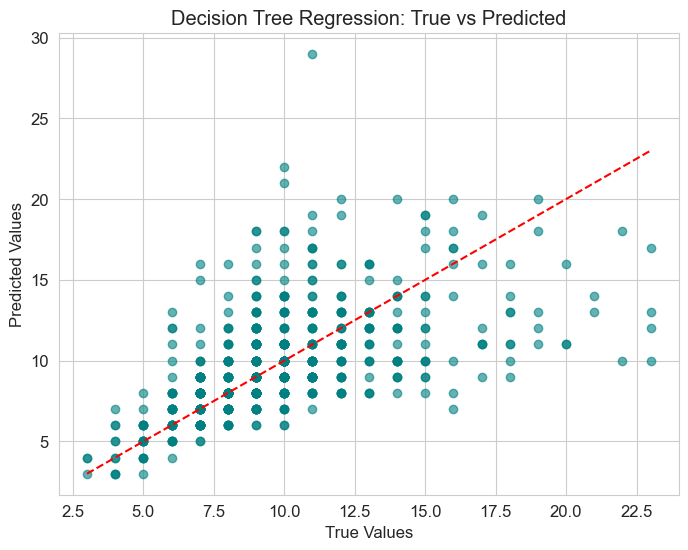

In [65]:
# Task 6: 绘制模型预测值和测试集“真实”值的图表。评论结果。
# 绘图：真实值 vs 预测值
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')  # 真实值和预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 理想预测线
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: True vs Predicted")
plt.grid(True)
plt.show()

从散点图中可以看出，大多数预测值点都分布在理想线附近，说明模型对大部分样本的预测是比较准确的。但也有一些点偏离较远，说明模型在部分样本上预测误差较大。这与之前测试集上得到的均方误差（MSE≈9.17）是一致的。我们可以尝试通过调整模型参数或使用集成方法（如随机森林）进一步提升模型性能。

In [68]:
# Task 7: 使用 5 倍交叉验证，试验不同的超参数

from sklearn.model_selection import GridSearchCV

# 定义超参数空间
param_grid = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20]
}

grid_search = GridSearchCV(
    estimator=tree_reg,
    param_grid=param_grid,
    cv=5,  # 5折交叉验证
    scoring='neg_mean_squared_error',  # 使用负均方误差作为评分标准
    refit=True  # 在网格搜索完成后，使用最佳参数重新训练模型
)

grid_search.fit(X_train, y_train)

print('Best hyperprameters: ', grid_search.best_params_)

# 利用最优超参数重新评估
y_train_grid_pred = grid_search.predict(X_train)
y_test_grid_pred = grid_search.predict(X_test)

mse_grid_train = mean_squared_error(y_train, y_train_grid_pred)
mse_grid_test = mean_squared_error(y_test, y_test_grid_pred)

print("MSE (grid) on the train set: ", mse_grid_train)
print("MSE (grid) on the train set: ", mse_grid_test)

Best hyperprameters:  {'max_depth': 5, 'min_samples_split': 2}
MSE (grid) on the train set:  4.6208854268363275
MSE (grid) on the train set:  5.731979482453469


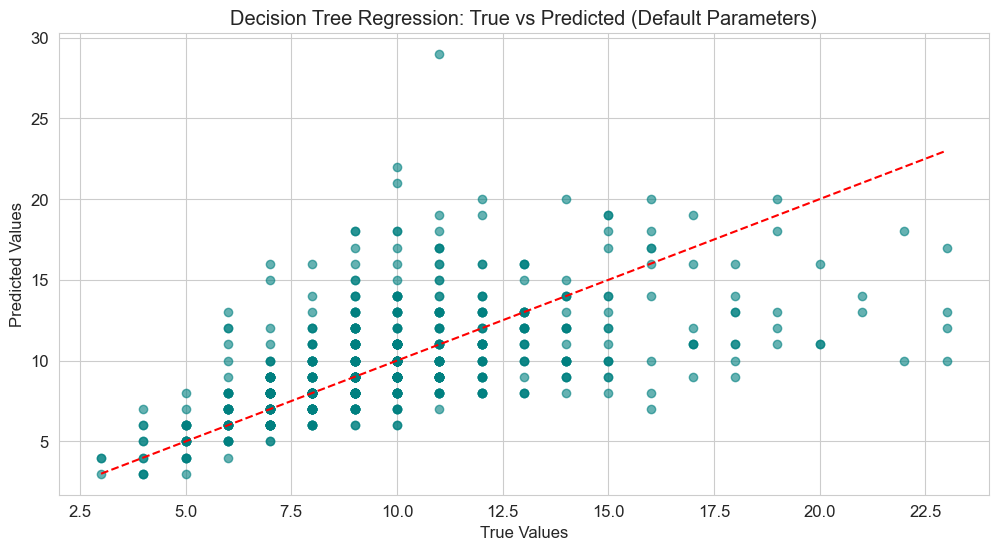

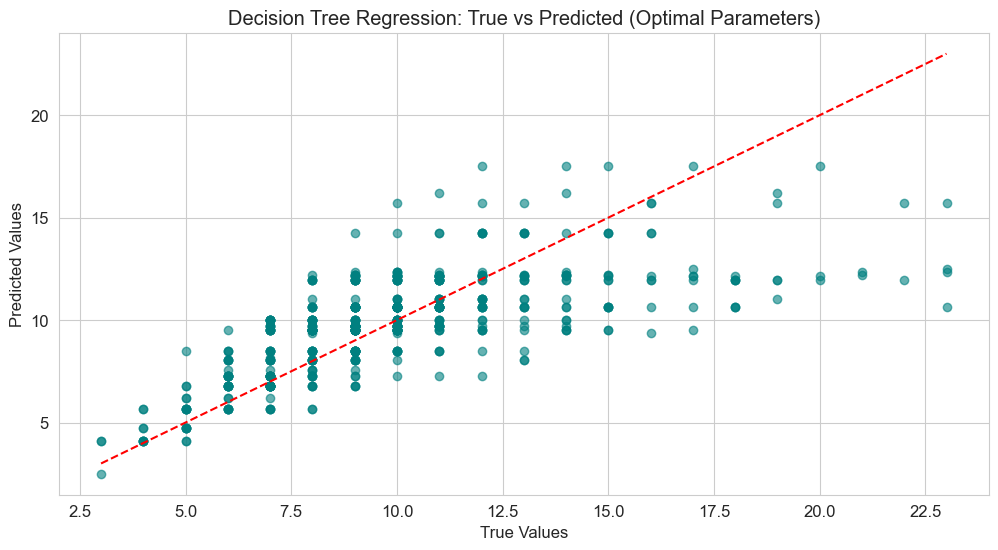

In [70]:
# Task 8: 绘制两个模型（默认参数和最优超参数）预测值和测试集“真实”值的图表。评论结果。
# 绘制默认参数模型的预测值与真实值的关系
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')  # 真实值和预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 理想预测线
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: True vs Predicted (Default Parameters)")
plt.grid(True)
plt.show()

# 绘制最优超参数模型的预测值与真实值的关系
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_grid_pred, alpha=0.6, color='teal')  # 真实值和预测值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 理想预测线
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: True vs Predicted (Optimal Parameters)")
plt.grid(True)
plt.show()

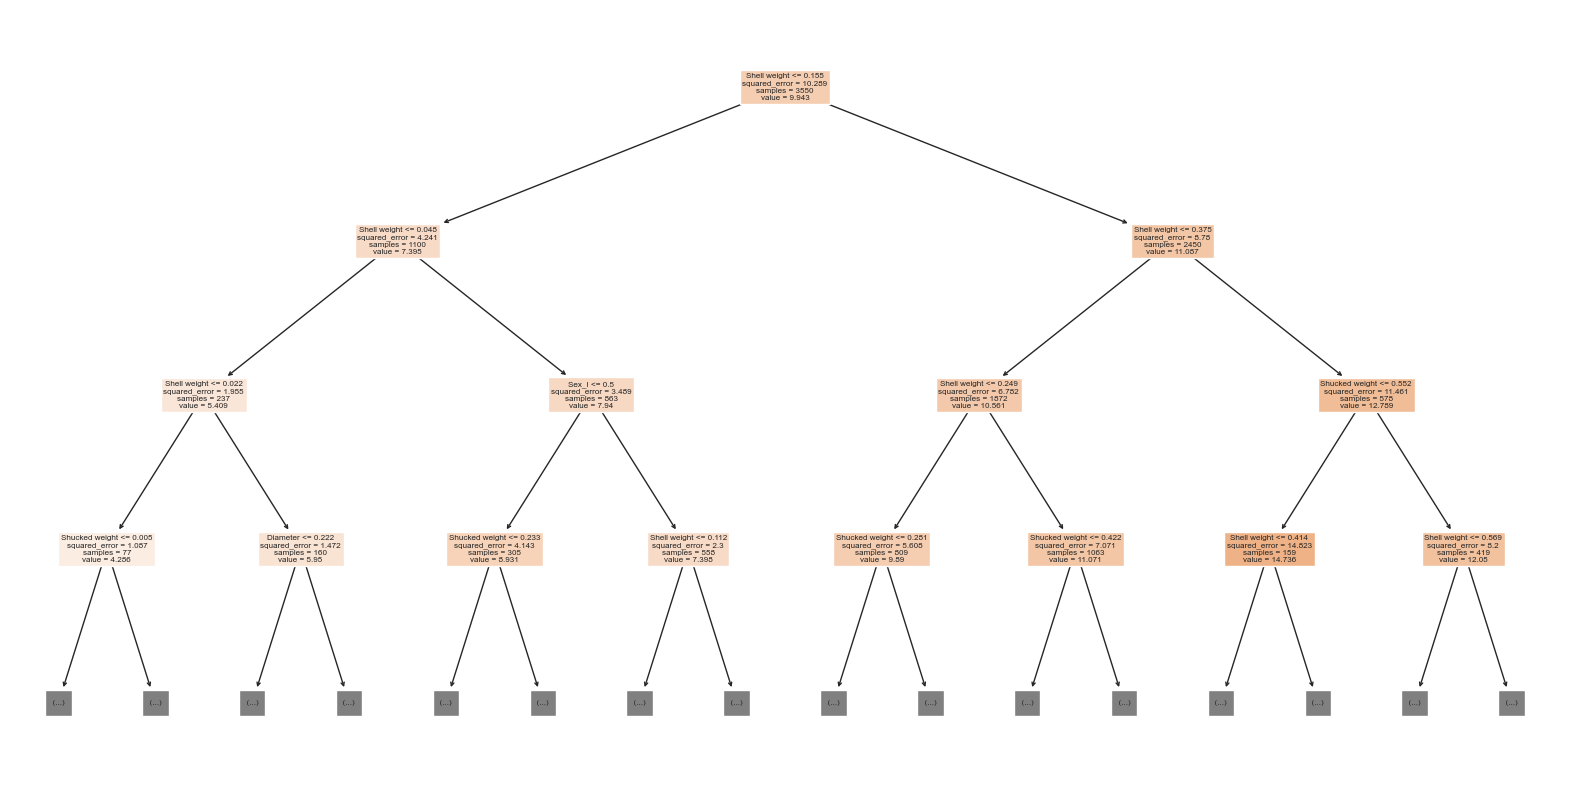

In [74]:
#Task 9: 可视化决策树
from sklearn.tree import plot_tree

# Extract the best model from GridSearchCV
best_dt_regressor = grid_search.best_estimator_

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_regressor, max_depth=3, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
# Task 10: